In [1]:
import pandas as pd

itp = pd.read_csv('../Datos/ITP/ITPD_E_R02.csv', sep=",")

# FILTRO POR PAÍSES UE Y AÑO 2019

In [32]:
codigos_ue = [
    "DEU",  # Alemania
    "AUT",  # Austria
    "BEL",  # Bélgica
    "BGR",  # Bulgaria
    "CYP",  # Chipre
    "HRV",  # Croacia
    "DNK",  # Dinamarca
    "SVK",  # Eslovaquia
    "SVN",  # Eslovenia
    "ESP",  # España
    "EST",  # Estonia
    "FIN",  # Finlandia
    "FRA",  # Francia
    "GRC",  # Grecia
    "HUN",  # Hungría
    "IRL",  # Irlanda
    "ITA",  # Italia
    "LVA",  # Letonia
    "LTU",  # Lituania
    "LUX",  # Luxemburgo
    "MLT",  # Malta
    "NLD",  # Países Bajos
    "POL",  # Polonia
    "PRT",  # Portugal
    "CZE",  # República Checa
    "ROU",  # Rumanía
    "SWE"   # Suecia
]
itp2019 = itp[itp['year']==2019] 
itp_ue = itp2019[itp2019['importer_iso3'].isin(codigos_ue)]
itp_ue = itp_ue.loc[itp_ue['trade'] != 0]

# CÁLCULO DEL CD1, ÍNDICE DE CONCENTRACIÓN DE HERFINDAHL-HIRSCHMAN (HHI)

In [52]:
# Crear la columna 'M' según las condiciones dadas
itp_ue.loc[:, 'M'] = itp_ue['trade'].where(itp_ue['importer_iso3'] != itp_ue['exporter_iso3'], 0)

# Crear la columna 'I' según las condiciones dadas y reemplazar NaN con 0
itp_ue.loc[:, 'I'] = itp_ue['trade'].where(itp_ue['importer_iso3'] == itp_ue['exporter_iso3'], 0).fillna(0)


# Crear la columna 'suma_grupo'
itp_ue['M total'] = itp_ue.groupby(['importer_iso3', 'industry_descr'])['M'].transform('sum')
itp_ue['s'] = itp_ue['M']/itp_ue['M total']
itp_ue['hhi'] = itp_ue['s']**2


# Supongamos que tu DataFrame se llama df
cd1 = itp_ue.groupby(['industry_descr', 'importer_iso3'])[['hhi', 'trade']].sum().reset_index()

cd1['Total trade'] = cd1.groupby('importer_iso3')['trade'].transform('sum')
cd1['peso'] = cd1['trade']/cd1['Total trade']
cd1['aport'] = cd1['hhi']*cd1['peso']
cd1_paises = cd1.groupby('importer_iso3')['aport'].sum()

cd1 = cd1[['industry_descr', 'importer_iso3', 'hhi']]


In [59]:
# Pivotar la tabla para tener países como columnas
hhi_por_producto_pais_pivot = cd1.pivot(index='industry_descr', columns='importer_iso3', values='hhi')

c:\Users\Usuario\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


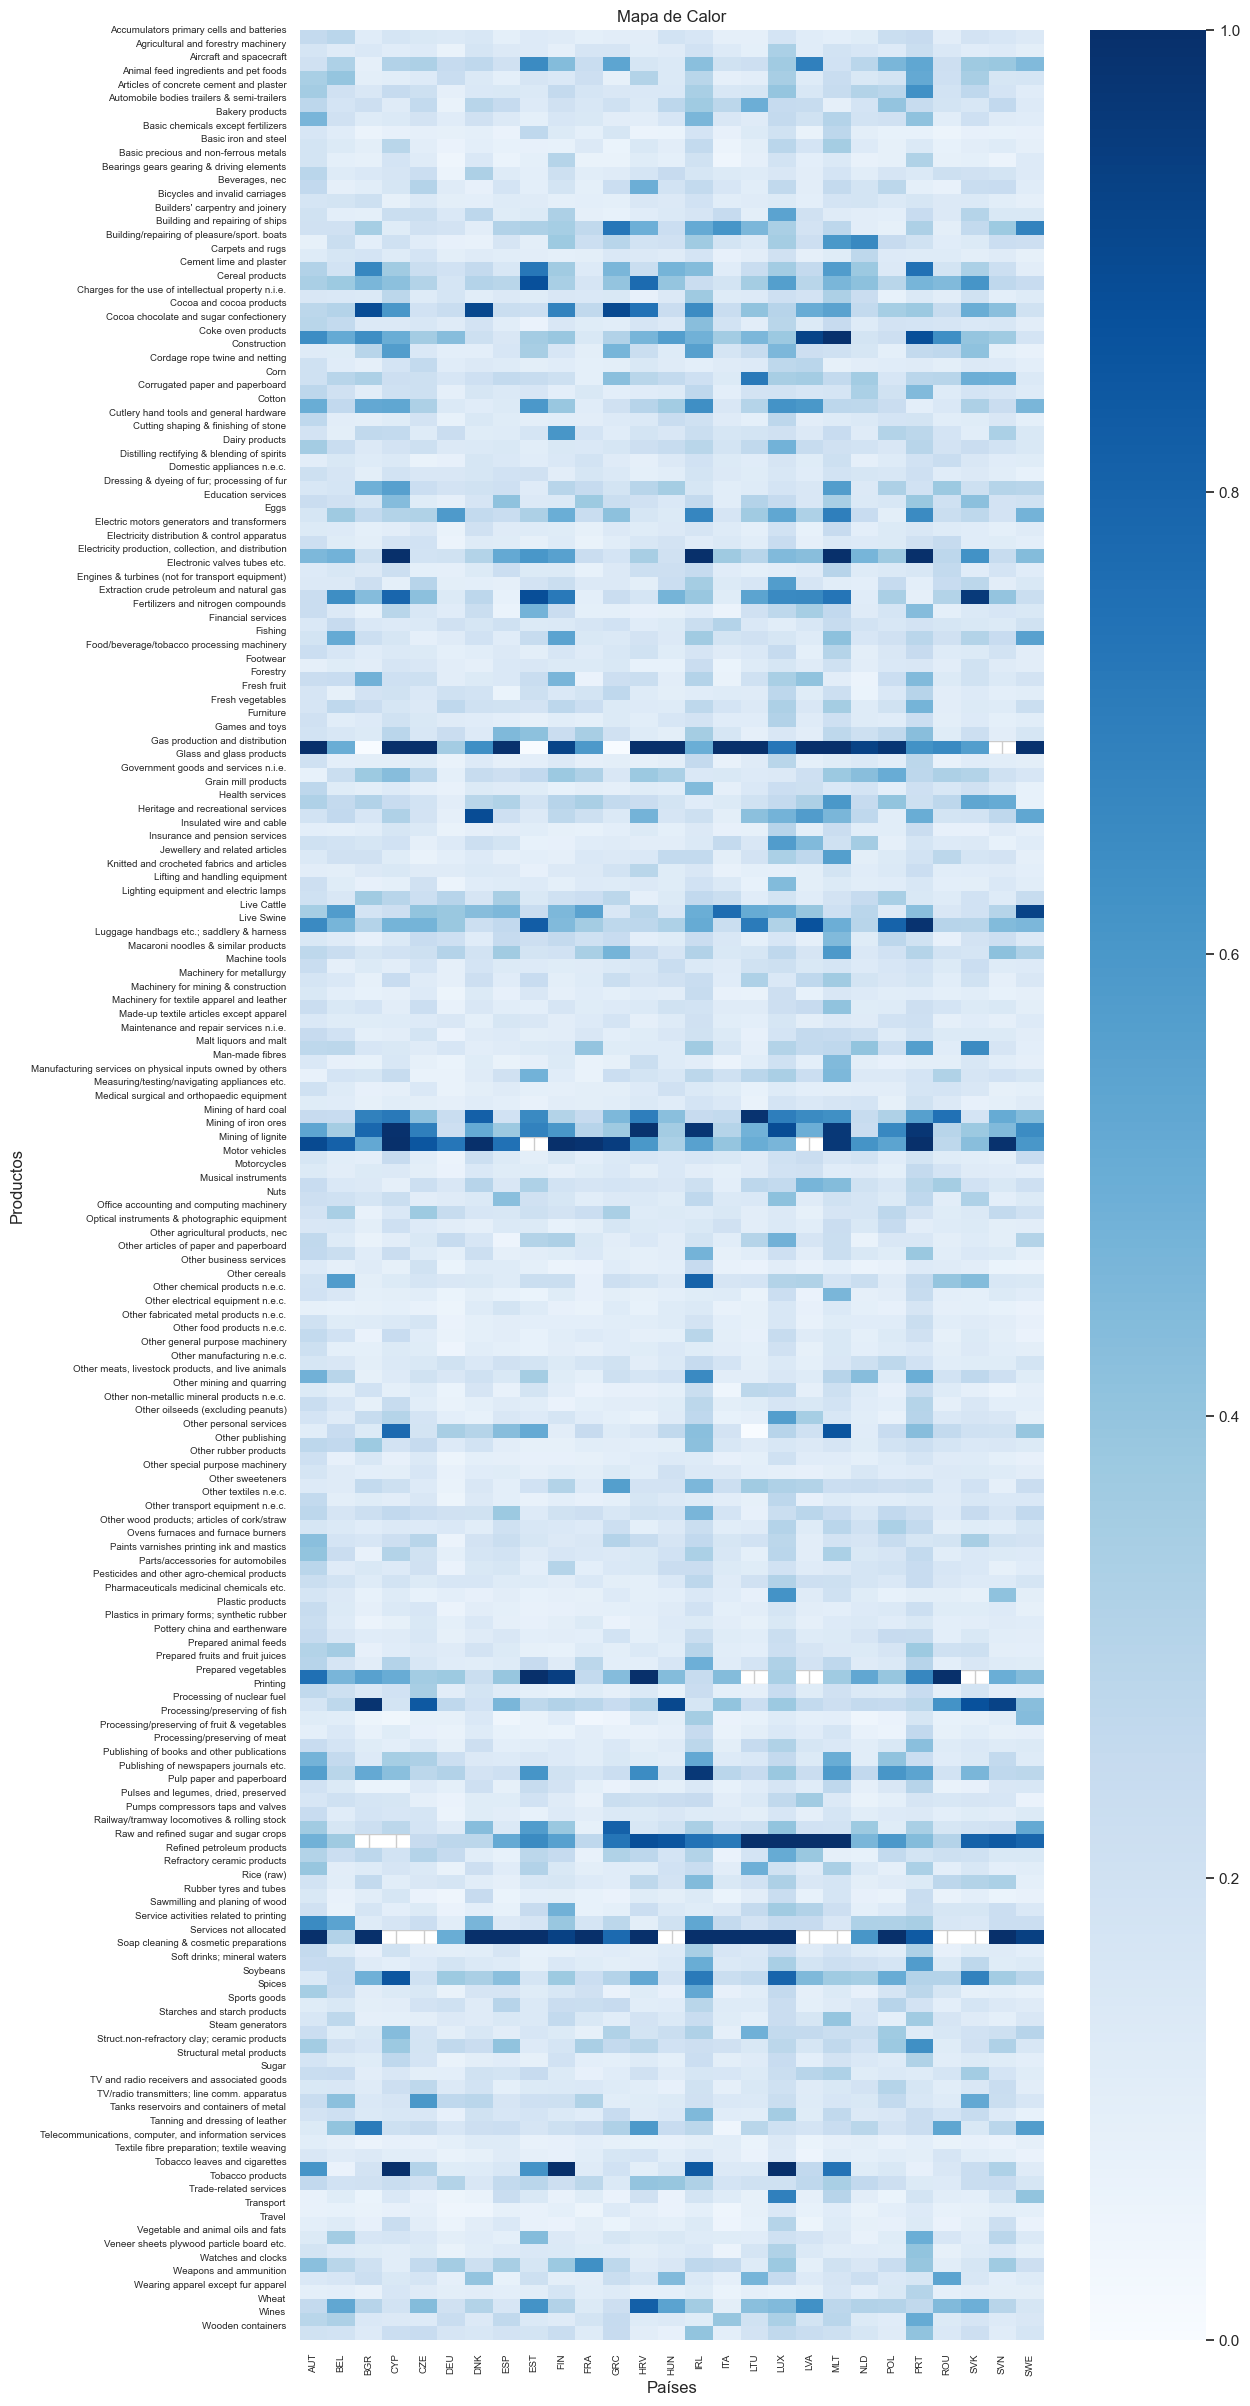

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
hhi_por_producto_pais_pivot=hhi_por_producto_pais_pivot.apply(pd.to_numeric, errors='coerce')

# Supongamos que df es tu DataFrame con columnas de países y filas de productos
# Asumiendo que las columnas de países y las filas de productos están correctamente indexadas

# Configurar el estilo del mapa de calor
sns.set(style="whitegrid")

# Crear el mapa de calor
plt.figure(figsize=(12, 30))
sns.heatmap(hhi_por_producto_pais_pivot, cmap = "Blues")
# Ajustar las etiquetas de los ejes
plt.xlabel('Países')
plt.ylabel('Productos')
plt.title('Mapa de Calor')


# Ajustar la fuente de las etiquetas en los ejes x e y
plt.xticks(fontsize=7)  # Puedes ajustar el tamaño de la fuente según tus preferencias

# Ajustar el espaciado y los ticks en el eje y
plt.yticks(range(len(hhi_por_producto_pais_pivot.index)), hhi_por_producto_pais_pivot.index, rotation=0, fontsize=7)


# Mostrar el mapa de calor
plt.show()


# Cálculo de CD2: Índice de Escasez

In [62]:

# Agrupar por 'exporter_iso3' y 'industry_descr' y sumar 'M' y 'I'
grouped_data = itp_ue.groupby(['importer_iso3', 'industry_descr']).agg({'M': 'sum', 'I': 'sum'}).reset_index()

# Calcular la columna 'M/(M+I)'
grouped_data['CD2'] = grouped_data['M'] / (grouped_data['M'] + grouped_data['I'])

# Convertir la columna 'M' a tipo float
grouped_data['CD2'] = grouped_data['CD2'].astype(float)

# Pivotar el DataFrame
pivot_df = grouped_data.pivot(index='industry_descr', columns='importer_iso3', values='CD2').astype(float)




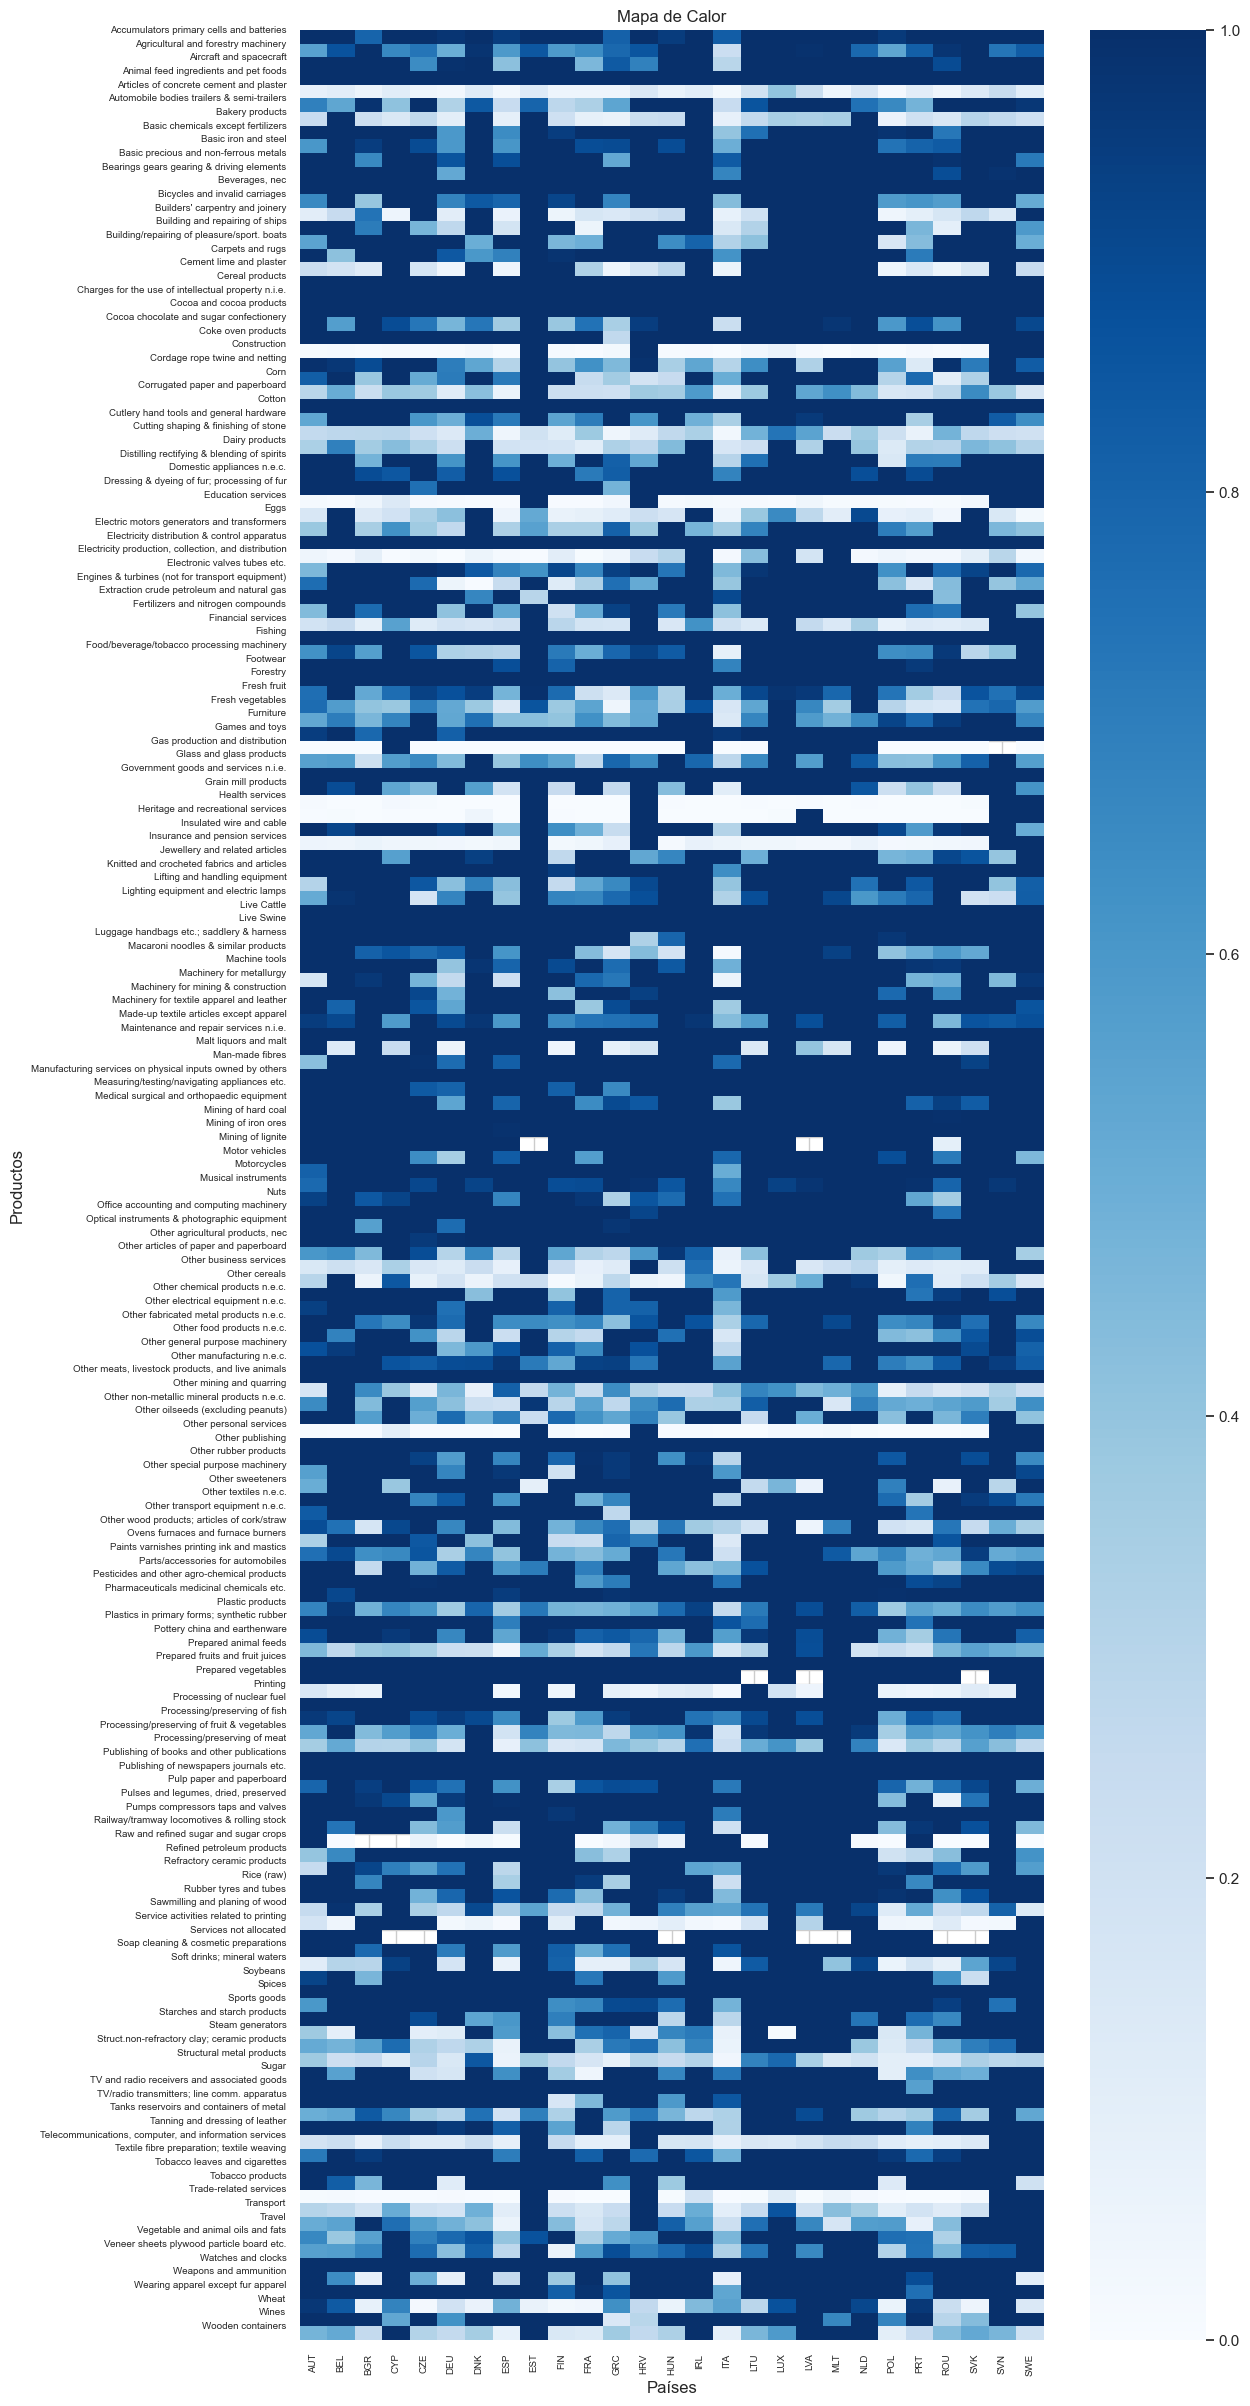

In [65]:

# Supongamos que df es tu DataFrame con columnas de países y filas de productos
# Asumiendo que las columnas de países y las filas de productos están correctamente indexadas

# Configurar el estilo del mapa de calor
sns.set(style="whitegrid")

# Crear el mapa de calor
plt.figure(figsize=(12, 30))
sns.heatmap(pivot_df, cmap = "Blues")
# Ajustar las etiquetas de los ejes
plt.xlabel('Países')
plt.ylabel('Productos')
plt.title('Mapa de Calor')


# Ajustar la fuente de las etiquetas en los ejes x e y
plt.xticks(fontsize=7)  # Puedes ajustar el tamaño de la fuente según tus preferencias

# Ajustar el espaciado y los ticks en el eje y
plt.yticks(range(len(pivot_df.index)), pivot_df.index, rotation=0, fontsize=7)


# Mostrar el mapa de calor
plt.show()


# CD3

In [90]:

itp2019 = itp[itp['year']==2019] 
itp_ue = itp_ue.loc[itp_ue['trade'] != 0]

In [91]:
# Crear la columna 'M' según las condiciones dadas
itp_ue.loc[:, 'M'] = itp_ue['trade'].where(itp_ue['importer_iso3'] != itp_ue['exporter_iso3'], 0)

# Crear la columna 'I' según las condiciones dadas y reemplazar NaN con 0
itp_ue.loc[:, 'X'] = itp_ue['trade'].where(itp_ue['exporter_iso3'] != itp_ue['importer_iso3'], 0).fillna(0)
# Crear la columna 'suma_grupo'
itp_ue['M total'] = itp_ue.groupby(['importer_iso3', 'industry_descr'])['M'].transform('sum')
itp_ue['X total'] = itp_ue.groupby(['exporter_iso3', 'industry_descr'])['X'].transform('sum')


# Crear una copia explícita de las filas que cumplen la condición
cd3 = itp_ue.loc[itp_ue['exporter_iso3'] == itp_ue['importer_iso3']].copy()
cd3 = cd3[cd3['importer_iso3'].isin(codigos_ue)]

# Realizar la operación en la copia
cd3['cd3'] = cd3['M total'] / cd3['X total']
cd3 = cd3[['importer_iso3', 'industry_descr', 'cd3']]


# Pivotar el DataFrame
pivot_df = cd3.pivot(index='industry_descr', columns='importer_iso3', values='cd3').astype(float)


In [93]:
pivot_df

importer_iso3,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LUX,LVA,MLT,NLD,POL,PRT,ROU,SVK,SVN,SWE
industry_descr,,,,,,,,,,,,,,,,,,,,,
Accumulators primary cells and batteries,NaN,NaN,1.311066,NaN,NaN,2.619132,NaN,1.301239,NaN,NaN,...,NaN,NaN,NaN,NaN,0.843233,NaN,NaN,NaN,NaN,NaN
Agricultural and forestry machinery,0.843332,1.437950,NaN,10.304838,1.989360,0.734638,2.261288,3.693520,2.680412,0.542422,...,NaN,6.811232,NaN,1.459744,1.160760,14.354409,8.623434,NaN,2.284821,1.416232
Aircraft and spacecraft,NaN,NaN,NaN,NaN,3.769408,1.920376,NaN,1.993430,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.072965,NaN,NaN,NaN
Articles of concrete cement and plaster,1.956828,0.508758,0.496914,332.991721,0.389269,0.499268,3.893472,0.407222,0.548446,1.940189,...,5.322100,0.420737,30.189664,3.529934,0.397525,1.733649,3.464796,1.744522,0.726672,10.871199
Automobile bodies trailers & semi-trailers,1.242705,0.763262,3.896644,5.651482,NaN,0.606801,3.545548,1.614622,0.859084,1.285882,...,NaN,NaN,NaN,3.777736,1.303547,2.503348,NaN,NaN,NaN,0.486985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weapons and ammunition,NaN,2.422639,0.784513,NaN,1.110087,0.485637,NaN,2.384290,NaN,0.944844,...,NaN,NaN,NaN,NaN,NaN,2.420694,NaN,NaN,NaN,0.917516
Wearing apparel except fur apparel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.098174,10.941972,...,NaN,NaN,NaN,NaN,NaN,1.328281,NaN,NaN,NaN,NaN
Wheat,0.908467,5.078306,0.028737,193.078652,0.027032,1.083333,0.488605,10.444991,0.210900,0.360522,...,3.544162,NaN,NaN,11.278944,0.828076,72.531695,0.746984,0.065534,NaN,0.763168


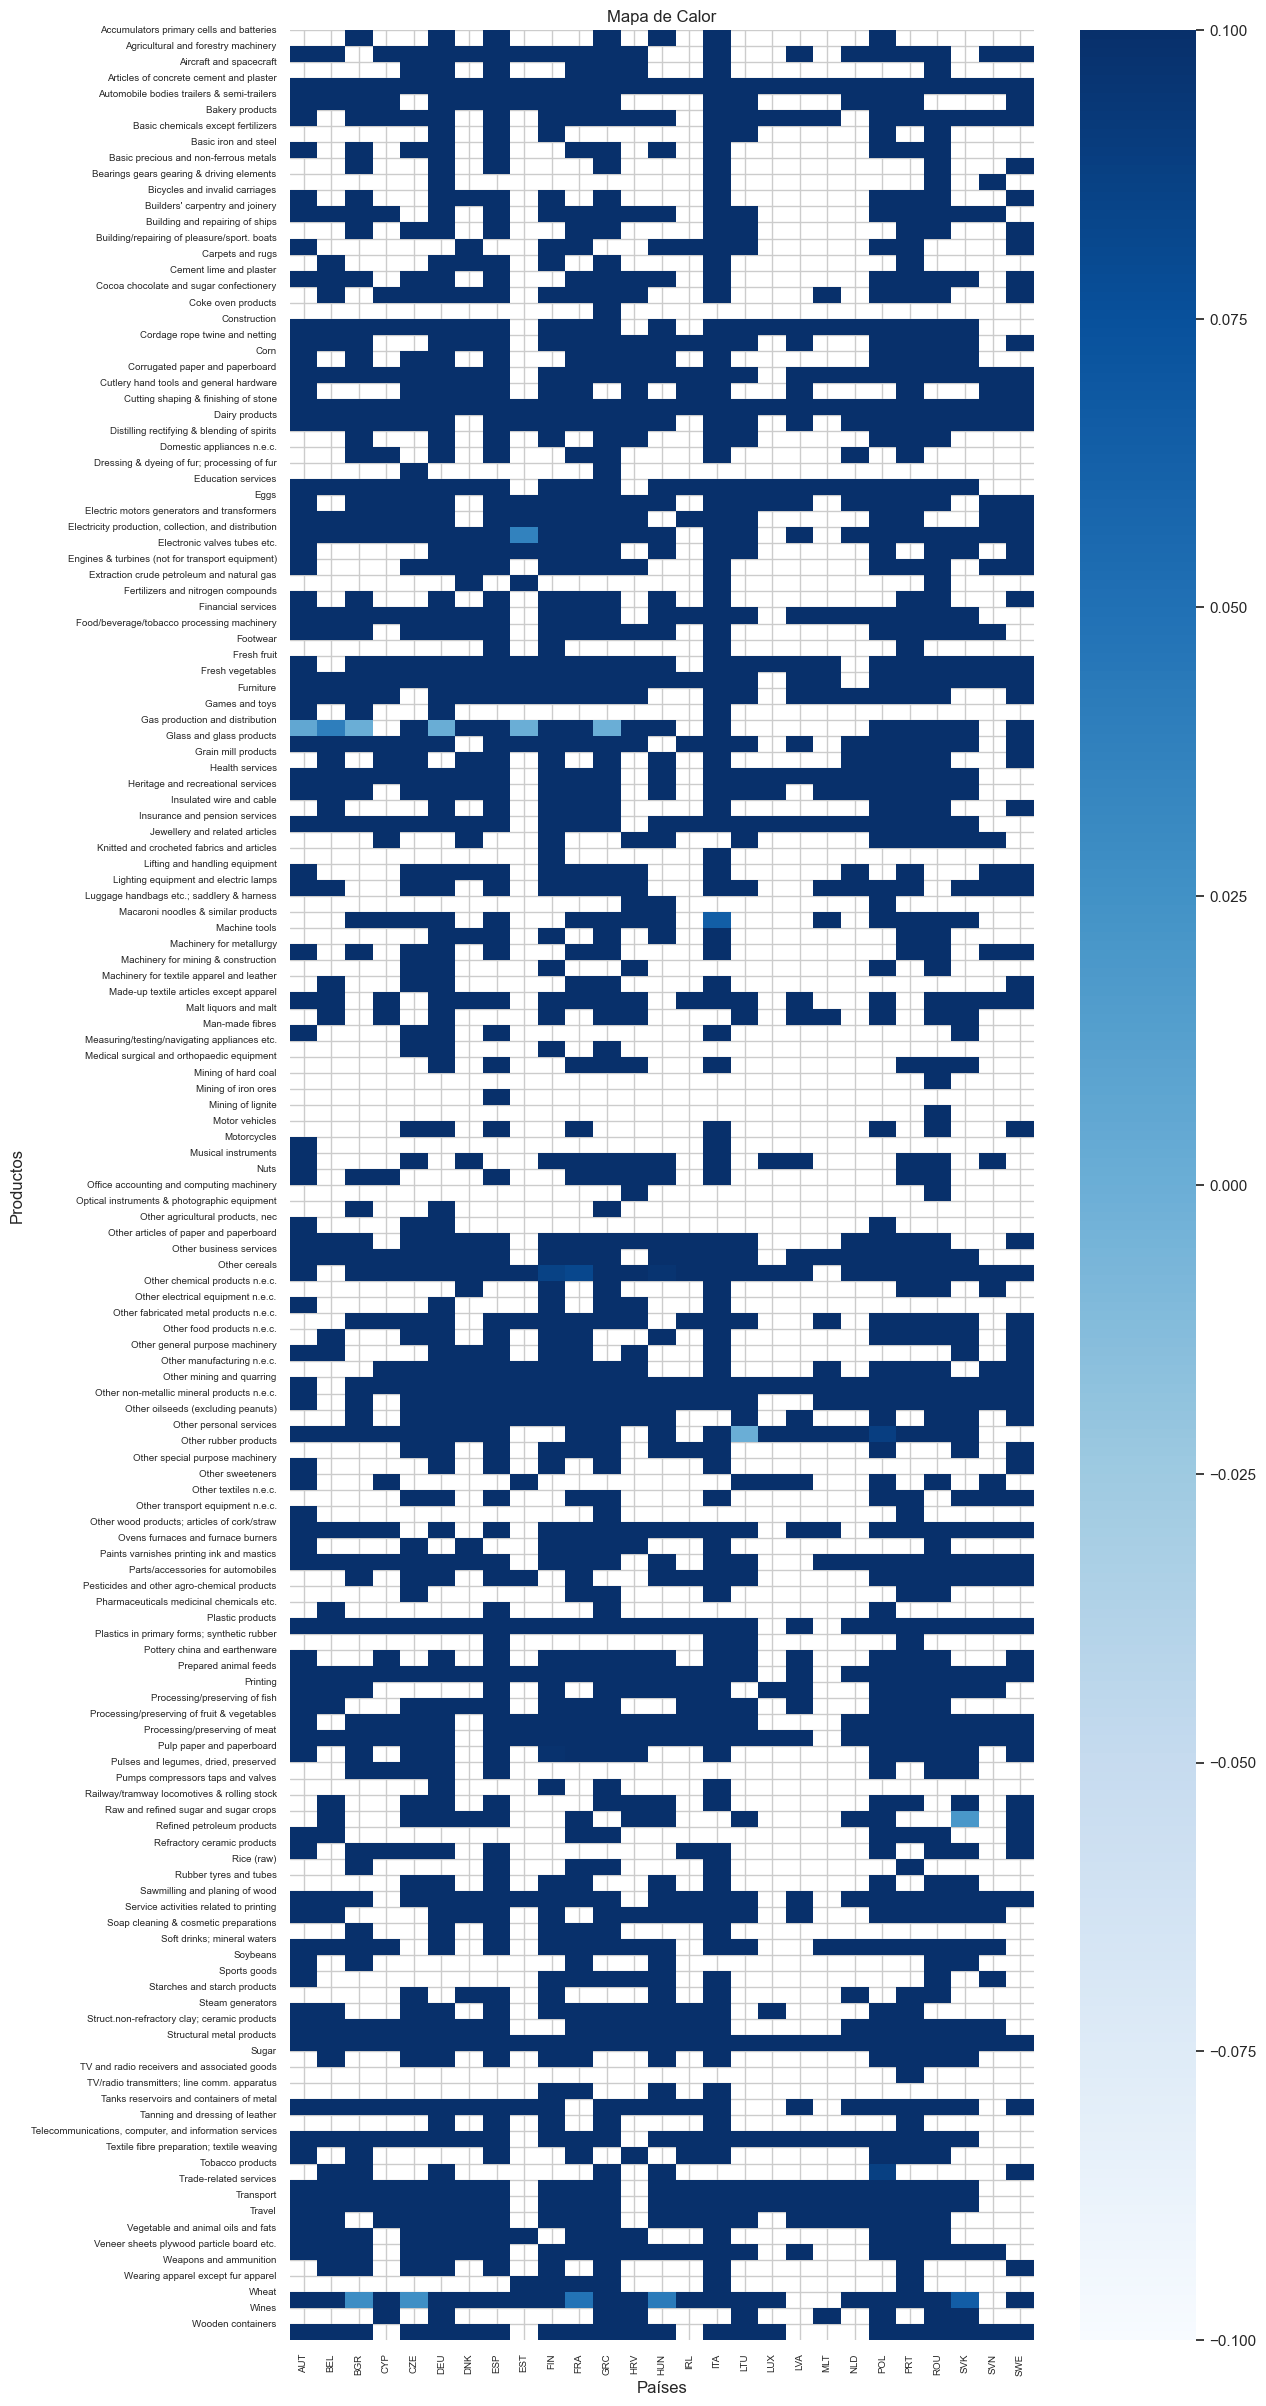

In [92]:

# Supongamos que df es tu DataFrame con columnas de países y filas de productos
# Asumiendo que las columnas de países y las filas de productos están correctamente indexadas

# Configurar el estilo del mapa de calor
sns.set(style="whitegrid")

# Crear el mapa de calor
plt.figure(figsize=(12, 30))
sns.heatmap(pivot_df, cmap = "Blues")
# Ajustar las etiquetas de los ejes
plt.xlabel('Países')
plt.ylabel('Productos')
plt.title('Mapa de Calor')


# Ajustar la fuente de las etiquetas en los ejes x e y
plt.xticks(fontsize=7)  # Puedes ajustar el tamaño de la fuente según tus preferencias

# Ajustar el espaciado y los ticks en el eje y
plt.yticks(range(len(pivot_df.index)), pivot_df.index, rotation=0, fontsize=7)


# Mostrar el mapa de calor
plt.show()


In [87]:
pivot_df

importer_iso3,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LUX,LVA,MLT,NLD,POL,PRT,ROU,SVK,SVN,SWE
industry_descr,,,,,,,,,,,,,,,,,,,,,
Accumulators primary cells and batteries,NaN,NaN,1.311066,NaN,NaN,2.619132,NaN,1.301239,NaN,NaN,...,NaN,NaN,NaN,NaN,0.843233,NaN,NaN,NaN,NaN,NaN
Agricultural and forestry machinery,0.843332,1.437950,NaN,10.304838,1.989360,0.734638,2.261288,3.693520,2.680412,0.542422,...,NaN,6.811232,NaN,1.459744,1.160760,14.354409,8.623434,NaN,2.284821,1.416232
Aircraft and spacecraft,NaN,NaN,NaN,NaN,3.769408,1.920376,NaN,1.993430,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.072965,NaN,NaN,NaN
Articles of concrete cement and plaster,1.956828,0.508758,0.496914,332.991721,0.389269,0.499268,3.893472,0.407222,0.548446,1.940189,...,5.322100,0.420737,30.189664,3.529934,0.397525,1.733649,3.464796,1.744522,0.726672,10.871199
Automobile bodies trailers & semi-trailers,1.242705,0.763262,3.896644,5.651482,NaN,0.606801,3.545548,1.614622,0.859084,1.285882,...,NaN,NaN,NaN,3.777736,1.303547,2.503348,NaN,NaN,NaN,0.486985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weapons and ammunition,NaN,2.422639,0.784513,NaN,1.110087,0.485637,NaN,2.384290,NaN,0.944844,...,NaN,NaN,NaN,NaN,NaN,2.420694,NaN,NaN,NaN,0.917516
Wearing apparel except fur apparel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.098174,10.941972,...,NaN,NaN,NaN,NaN,NaN,1.328281,NaN,NaN,NaN,NaN
Wheat,0.908467,5.078306,0.028737,193.078652,0.027032,1.083333,0.488605,10.444991,0.210900,0.360522,...,3.544162,NaN,NaN,11.278944,0.828076,72.531695,0.746984,0.065534,NaN,0.763168
